# State of Data Brazil 2022 | Kaggle

## Objetivo

Quais fatores tornam um profissional da área de dados satisfeito

## Metodologia

Usarei a base de dados disponibilizada no desafio State of Data 2022

### Configuração inicial

In [2]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Configurando Pandas para exibir todas as colunas (são muitas colunas)
pd.set_option('display.max_columns', None)

#Revertendo a configuração
#pd.reset_option('display.max_columns')

In [4]:
#Carregamento do Dataset

data = pd.read_csv('data/State_of_data_2022.csv')

In [5]:
#Melhorando a leitura das colunas

data.columns = [coluna.strip("()").replace("'", "").replace(", ", "_") for coluna in data.columns]

In [5]:
#Testando o novo modo de leitura das colunas
data.head()

,P0_id,P1_a _Idade,P1_a_1 _Faixa idade,P1_b _Genero,P1_c _Cor/raca/etnia,P1_d _PCD,P1_e _experiencia_profissional_prejudicada,P1_f _aspectos_prejudicados,P1_g _vive_no_brasil,P1_i _Estado onde mora,P1_i_1 _uf onde mora,P1_i_2 _Regiao onde mora,P1_j _Mudou de Estado?,P1_k _Regiao de origem,P1_l _Nivel de Ensino,P1_m _Área de Formação,P2_a _Qual sua situação atual de trabalho?,P2_b _Setor,P2_c _Numero de Funcionarios,P2_d _Gestor?,P2_e _Cargo como Gestor,P2_f _Cargo Atual,P2_g _Nivel,P2_h _Faixa salarial,P2_i _Quanto tempo de experiência na área de dados você tem?,P2_j _Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,P2_k _Você está satisfeito na sua empresa atual?,P2_l _Qual o principal motivo da sua insatisfação com a empresa atual?,P2_l_1 _Falta de oportunidade de crescimento no emprego atual,P2_l_2 _Salário atual não corresponde ao mercado,P2_l_3 _Não tenho uma boa relação com meu líder/gestor,P2_l_4 _Gostaria de trabalhar em em outra área de atuação,P2_l_5 _Gostaria de receber mais benefícios,P2_l_6 _O clima de trabalho/ambiente não é bom,P2_l_7 _Falta de maturidade analítica na empresa,P2_m _Você participou de entrevistas de emprego nos últimos 6 meses?,P2_n _Você pretende mudar de emprego nos próximos 6 meses?,P2_o _Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,P2_o_1 _Remuneração/Salário,P2_o_2 _Benefícios,P2_o_3 _Propósito do trabalho e da empresa,P2_o_4 _Flexibilidade de trabalho remoto,P2_o_5 _Ambiente e clima de trabalho,P2_o_6 _Oportunidade de aprendizado e trabalhar com referências na área,P2_o_7 _Plano de carreira e oportunidades de crescimento profissional,P2_o_8 _Maturidade da empresa em termos de tecnologia e dados,P2_o_9 _Qualidade dos gestores e líderes,P2_o_10 _Reputação que a empresa tem no mercado,P2_p _Atualmente qual a sua forma de trabalho?,P2_q _Qual a forma de trabalho ideal para você?,P2_r _Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,P2_s _Sua empresa passu por Layoff em 2022?,P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,P3_b _Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?,P3_b_1 _Analytics Engineer,P3_b_2 _Engenharia de Dados/Data Engineer,P3_b_3 _Analista de Dados/Data Analyst,P3_b_4 _Cientista de Dados/Data Scientist,P3_b_5 _Database Administrator/DBA,P3_b_6 _Analista de Business Intelligence/BI,P3_b_7 _Arquiteto de Dados/Data Architect,P3_b_8 _Data Product Manager/DPM,P3_b_9 _Business Analyst,P3_c _Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?,P3_c_1 _Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.,P3_c_2 _Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.,P3_c_3 _Atração_seleção e contratação de talentos para o time de dados.,P3_c_4 _Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.,P3_c_5 _Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados_garantindo a qualidade e confiabilidade da informação.,P3_c_6 _Sou gestor da equipe responsável pela entrega de dados_estudos_relatórios e dashboards para as áreas de negócio da empresa.,P3_c_7 _Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.,P3_c_8 _Apesar de ser gestor ainda atuo na parte técnica_construindo soluções/análises/modelos etc.,P3_c_9 _Gestão de projetos de dados_cuidando das etapas_equipes envolvidas_atingimento dos objetivos etc.,P3_c_10 _Gestão de produtos de dados_cuidando da visão dos produtos_backlog_feedback de usuários etc.,P3_c_11 _Gestão de pessoas_apoio no desenvolvimento das pessoas_evolução de carreira,P3_d _Quais são os 3 maiores desafios que você tem como gestor no atual momento?,P3_d

In [6]:
#Acessando o id dos usuários pesquisados para criar novos datasets, separando todas as 8 partes da pesquisa
#Deixando-as vinculadas ao id

coluna_principal = data.iloc[:,0]

### Trabalhando os dados de análise de desafios

In [7]:
#Separando todas as perguntas da parte 3 em um novo dataset para análise de desafios

colunas_p3 = [coluna for coluna in data.columns if coluna.startswith('P3')]

data_parte3 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p3], axis=1)

In [24]:
data_parte3.head()

,P0_id,P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,P3_b _Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?,P3_b_1 _Analytics Engineer,P3_b_2 _Engenharia de Dados/Data Engineer,P3_b_3 _Analista de Dados/Data Analyst,P3_b_4 _Cientista de Dados/Data Scientist,P3_b_5 _Database Administrator/DBA,P3_b_6 _Analista de Business Intelligence/BI,P3_b_7 _Arquiteto de Dados/Data Architect,P3_b_8 _Data Product Manager/DPM,P3_b_9 _Business Analyst,P3_c _Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?,P3_c_1 _Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.,P3_c_2 _Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.,P3_c_3 _Atração_seleção e contratação de talentos para o time de dados.,P3_c_4 _Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.,P3_c_5 _Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados_garantindo a qualidade e confiabilidade da informação.,P3_c_6 _Sou gestor da equipe responsável pela entrega de dados_estudos_relatórios e dashboards para as áreas de negócio da empresa.,P3_c_7 _Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.,P3_c_8 _Apesar de ser gestor ainda atuo na parte técnica_construindo soluções/análises/modelos etc.,P3_c_9 _Gestão de projetos de dados_cuidando das etapas_equipes envolvidas_atingimento dos objetivos etc.,P3_c_10 _Gestão de produtos de dados_cuidando da visão dos produtos_backlog_feedback de usuários etc.,P3_c_11 _Gestão de pessoas_apoio no desenvolvimento das pessoas_evolução de carreira,P3_d _Quais são os 3 maiores desafios que você tem como gestor no atual momento?,P3_d_1 _a Contratar novos talentos.,P3_d_2 _b Reter talentos.,P3_d_3 _c Convencer a empresa a aumentar os investimentos na área de dados.,P3_d_4 _d Gestão de equipes no ambiente remoto.,P3_d_5 _e Gestão de projetos envolvendo áreas multidisciplinares da empresa.,P3_d_6 _f Organizar as informações e garantir a qualidade e confiabilidade.,P3_d_7 _g Conseguir processar e armazenar um alto volume de dados.,P3_d_8 _h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos.,P3_d_9 _i Desenvolver e manter modelos Machine Learning em produção.,P3_d_10 _j Gerenciar a expectativa das áreas de negócio em relação as entregas das equipes de dados.,P3_d_11 _k Garantir a manutenção dos projetos e modelos em produção_em meio ao crescimento da empresa.,P3_d_12 _Conseguir levar inovação para a empresa através dos dados.,P3_d_13 _Garantir retorno do investimento (ROI) em projetos de dados.,P3_d_14 _Dividir o tempo entre entregas técnicas e gestão.
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,1 - 3,Engenharia de Dados/Data Engineer,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sou gestor da equipe responsável pela entrega ...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Dividir o tempo entre entregas técnicas e gest...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


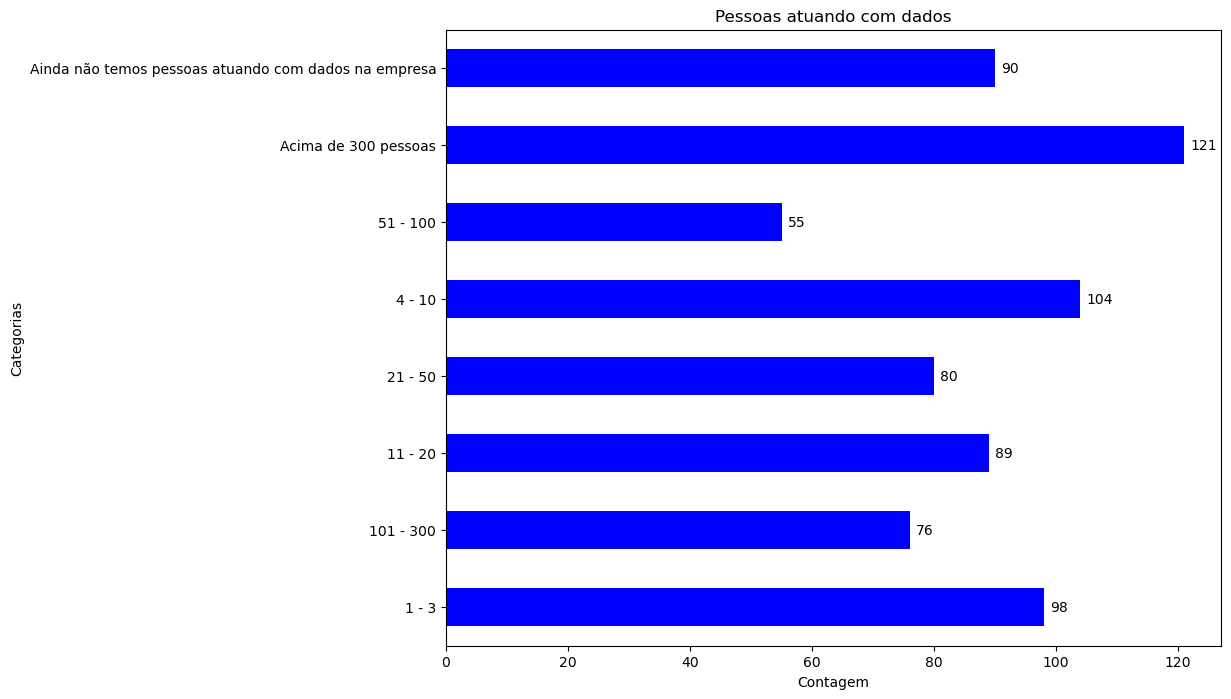

In [22]:
#CONTAGEM PARA DETERMINAR O TAMANHO DO SETOR DE DADOS DENTRO DAS EMPRESAS

trab_dados = data_parte3['P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?']

contagem_trab_dados = trab_dados.value_counts()

contagem_trab_dados = contagem_trab_dados.sort_index()

plt.figure(figsize=(10,8))
contagem_trab_dados.plot(kind='barh', color='blue')
plt.title('Pessoas atuando com dados')
plt.xlabel('Contagem')
plt.ylabel('Categorias')

for i, v in enumerate(contagem_trab_dados):
    plt.text(v + 1, i, str(v), ha='left', va='center')

plt.show()



Insight: A área de dados é bem distribuida de acordo com o tamanho das empresas

In [51]:


funcao_dados = data_parte3['P3_b _Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?']
funcao_dados = funcao_dados.replace('NaN', np.nan)
funcao_dados = funcao_dados.dropna()

contagem_valores = funcao_dados.value_counts()

valores_mais_de_10_vezes = contagem_valores[contagem_valores > 10]

print(valores_mais_de_10_vezes.index.tolist())



['Analista de Dados/Data Analyst', 'Analista de Business Intelligence/BI', 'Business Analyst', 'Cientista de Dados/Data Scientist']


Insight: Funções com maior ocorrência estão limitadas basicamente ao Analista de Dados, Cientista de Dados e Analista de BI.

In [52]:


funcao_dados = data_parte3['P3_c _Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?']
funcao_dados = funcao_dados.replace('NaN', np.nan)
funcao_dados = funcao_dados.dropna()

contagem_valores = funcao_dados.value_counts()

valores_mais_de_10_vezes = contagem_valores[contagem_valores > 10]

print(valores_mais_de_10_vezes.index.tolist())


['Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.', 'Gestão de pessoas, apoio no desenvolvimento das pessoas, evolução de carreira,', 'Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.']


Insight: Gestores e líderes parecem ter um rotina mais bem definida

In [57]:
funcao_dados = data_parte3['P3_d _Quais são os 3 maiores desafios que você tem como gestor no atual momento?']
funcao_dados = funcao_dados.replace('NaN', np.nan)
funcao_dados = funcao_dados.dropna()

contagem_valores = funcao_dados.value_counts()

valores_mais_de_10_vezes = contagem_valores[contagem_valores > 8]

print(valores_mais_de_10_vezes.index.tolist())

['Organizar as informações e garantir a qualidade e confiabilidade.']


Insight: Garantir a qualidade dos dados é um dos maiores desafios